In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [3]:
X

array([[ 1.15305151,  2.6352378 ],
       [ 0.79293552, -0.13776332],
       [ 1.86439458,  2.50288305],
       ...,
       [-2.17303639, -0.23431797],
       [-6.39834451,  9.72520327],
       [-7.32542053,  6.31709752]], shape=(1000, 2))

In [4]:
y

array([2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 0, 0, 2,
       2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2,
       2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 2,
       1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0,
       0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1,
       0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0,
       0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1,
       0, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2,
       0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1,
       0, 1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 0, 2, 0, 2,

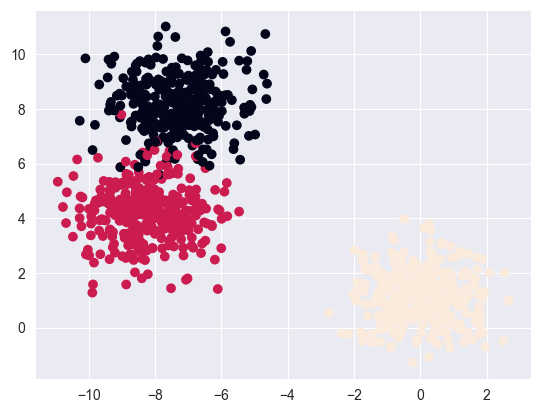

In [9]:
plt.scatter(X[:,0], X[:,1], c=y)

In [10]:
#Standardization ---> feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [12]:
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.cluster import KMeans

In [14]:
#Elbow method to select K value
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_trained_scaled)
    wcss.append(kmeans.inertia_)

In [15]:
wcss

[1339.9999999999998,
 304.73624243989116,
 110.69857651018964,
 97.3612692713943,
 83.37017987064459,
 67.57714489430828,
 61.64735411655894,
 59.416192074098035,
 49.349223343629305,
 47.513420919181925]

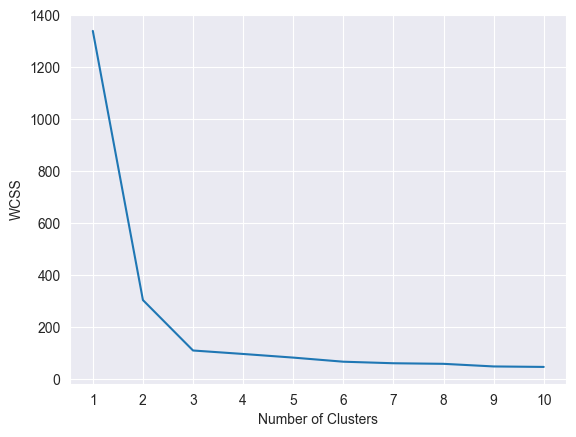

In [16]:
## Plot elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [17]:
## From graph it is clear that n_clusters = 3
kmeans = KMeans(n_clusters=3, init='k-means++')

In [18]:
kmeans.fit_predict(X_trained_scaled)

array([2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 0,
       1, 2, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 2, 0, 2,
       1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0,
       0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 1, 0,
       0, 1, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 1,
       0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 2, 0, 0,
       0, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0,
       2, 1, 1, 0, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2,
       2, 1, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1,
       2, 1, 2, 1, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,

In [19]:
y_pred = kmeans.predict(X_test_scaled)

In [20]:
y_pred

array([2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 2, 0,
       2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0, 1,
       2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1,
       0, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2,
       0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0,
       2, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0,
       2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 1, 2, 1,
       1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 1,
       2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1,
       0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 0,

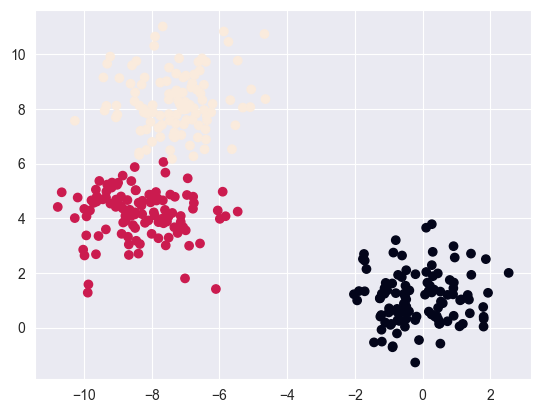

In [22]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)

In [23]:
## Valdating K values we will use 2 techniques
## kneelocator
## Silhouttee Scoring

In [24]:
##Knee Locator
!pip install kneed

In [25]:
from kneed import KneeLocator

In [26]:
kl = KneeLocator(range(1,11),wcss, curve='convex', direction='decreasing')

In [27]:
kl.elbow

np.int64(3)

In [28]:
## Silhoutte Scoring
from sklearn.metrics import silhouette_score

In [29]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans= KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_trained_scaled)
    score = silhouette_score(X_trained_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [30]:
silhouette_coefficients

[0.7015132883158084,
 0.6665141637743278,
 0.5142941210186778,
 0.48027839344910767,
 0.4697339162831067,
 0.3330232613419129,
 0.3395013949838096,
 0.3226043431610943,
 0.33979521089510784]

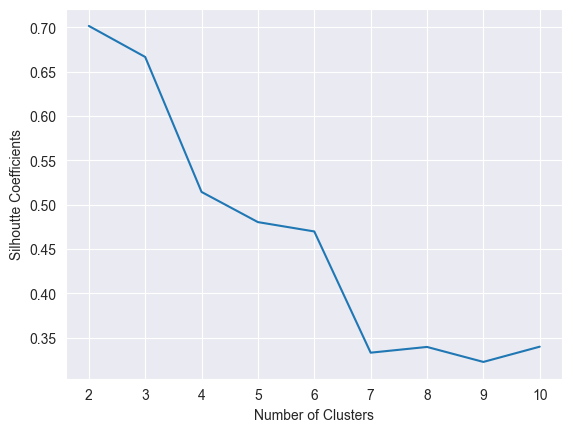

In [31]:
## Plot elbow curve
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coefficients")
plt.show()